In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
full = cv2.imread('../DATA/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

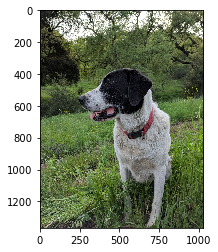

In [4]:
plt.imshow(full)

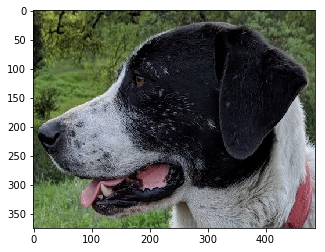

In [6]:
face = cv2.imread('../DATA/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)

In [7]:
#note that in TM method we need the exact template from the image, including the dims
#face is  the template, we need to match it in img
#use eval here to evaluate a string stored in a variable, as a func

height, width, channels = face.shape


In [8]:
width

486

In [9]:
height

375

In [10]:
# The Full Image to search on
full = cv2.imread('../DATA/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)


# The Template to Match (slide this along)
face= cv2.imread('../DATA/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

In [12]:
#methods used stored in a list (tm)

methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR' ,'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

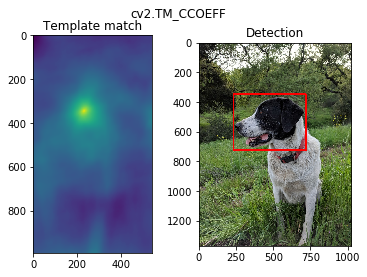

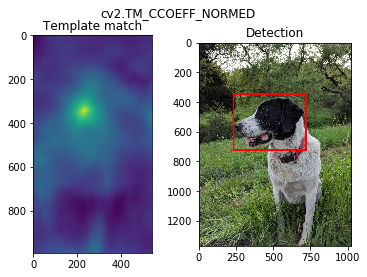

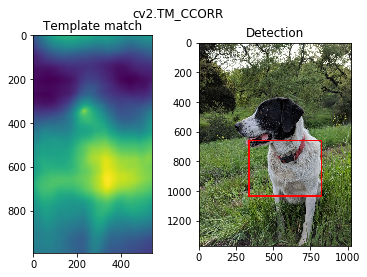

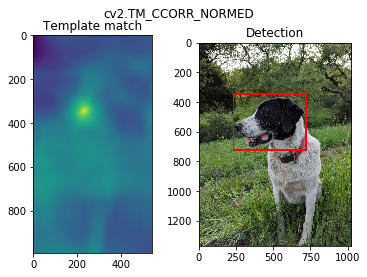

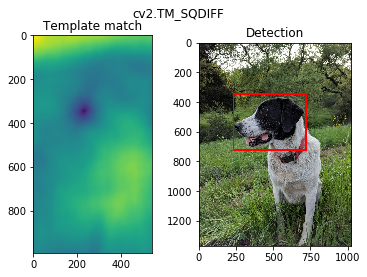

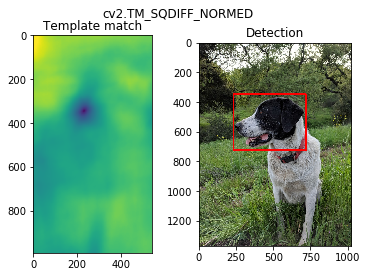

In [13]:
#each method above will return a heat map, with brightness where the res is high (high match probs), but sqdiff and sqdiff_normed minimises the loss  (itself)  to match the original img and hence the matched spots will be dark

for m in methods:
    
    method = eval(m)
    full_copy = full.copy()
    
    res = cv2.matchTemplate(full_copy, face, method)
    
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        
        top_left = min_loc
        
    else:
        
        top_left = max_loc
        
    bottom_right = (top_left[0] + width, top_left[1] + height)
    
    cv2.rectangle(full_copy, top_left, bottom_right, 255, 10)
    
    #plotting
    
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Template match')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detection')
    plt.suptitle(m)
    
    plt.show()
    
    print("\n \n")
        